# Functional enrichment analysis with g:Profiler

In [1]:
library(tidyverse)
library(gprofiler2)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.2     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



## Load DEG results

In [2]:
deg <- data.table::fread("../../_m/genes/diffExpr_maleVfemale_FDR05.txt") %>%
    select(gencodeID, ensemblID, Symbol, logFC, "adj.P.Val")
deg %>% head(2)

gencodeID,ensemblID,Symbol,logFC,adj.P.Val
<chr>,<chr>,<chr>,<dbl>,<dbl>
ENSG00000229236.1,ENSG00000229236,TTTY10,6.919904,5.186692e-243
ENSG00000154620.5,ENSG00000154620,TMSB4Y,7.017845,4.942051e-238


## Calculated enrichment and visual plot

In [3]:
save_ggplots <- function(fn, p, w, h){
    for(ext in c('.pdf', '.png', '.svg')){
        ggsave(paste0(fn, ext), plot=p, width=w, height=h)
    }
}

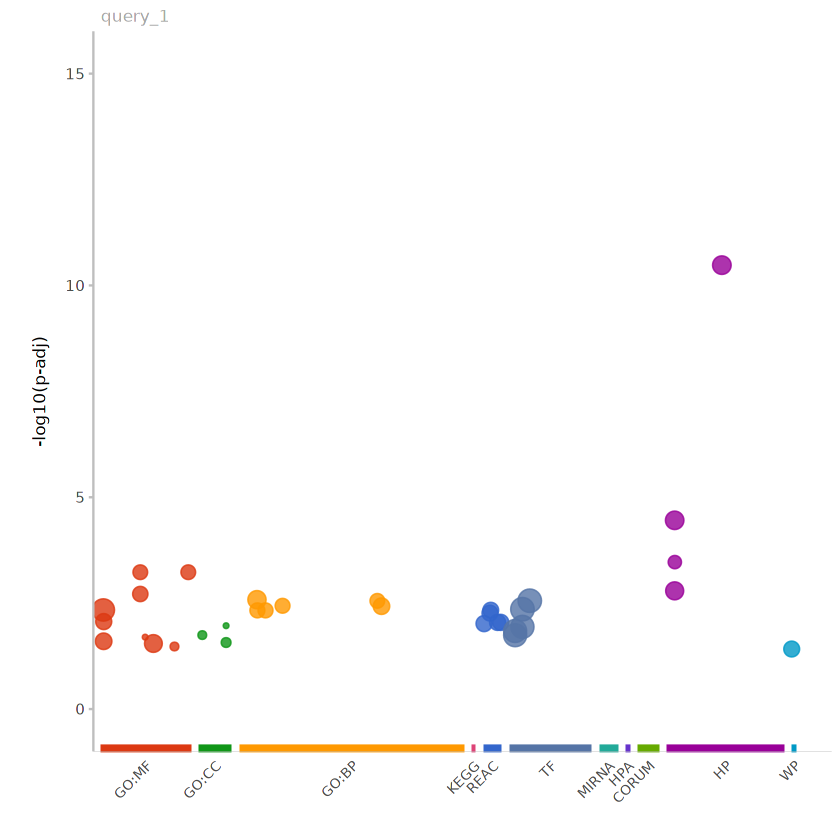

In [4]:
gostres <- gost(query=deg$ensemblID, organism="hsapiens")
gostres$result %>% 
    data.table::fwrite(file = "allDEGs_functional_enrichment.txt", sep="\t")

p <- gostplot(gostres, capped = FALSE, interactive = FALSE)
print(p)
save_ggplots("allDEGs_manhattan", p, 9, 5)

In [5]:
gostres$result 

query,significant,p_value,term_size,query_size,intersection_size,precision,recall,term_id,source,term_name,effective_domain_size,source_order,parents
<chr>,<lgl>,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<int>,<int>,<list>
query_1,TRUE,2.614418e-03,203,49,7,0.14285714,0.034482759,GO:0006413,GO:BP,translational initiation,18123,2416,"GO:0006412, GO:0044237"
query_1,TRUE,2.788989e-03,30,49,4,0.08163265,0.133333333,GO:0070076,GO:BP,histone lysine demethylation,18123,18678,GO:0016577
query_1,TRUE,3.645112e-03,32,49,4,0.08163265,0.125000000,GO:0016577,GO:BP,histone demethylation,18123,5874,"GO:0006482, GO:0016570"
query_1,TRUE,3.728391e-03,74,49,5,0.10204082,0.067567568,GO:0070988,GO:BP,demethylation,18123,19239,GO:0008152
query_1,TRUE,4.682296e-03,34,49,4,0.08163265,0.117647059,GO:0008214,GO:BP,protein dealkylation,18123,3568,GO:0006464
query_1,TRUE,4.682296e-03,34,49,4,0.08163265,0.117647059,GO:0006482,GO:BP,protein demethylation,18123,2472,"GO:0008214, GO:0070988"
query_1,TRUE,1.077759e-02,4,50,2,0.04000000,0.500000000,GO:0098983,GO:CC,"symmetric, GABA-ergic, inhibitory synapse",18964,3703,"GO:0032280, GO:0060077, GO:0098982"
query_1,TRUE,1.793235e-02,5,50,2,0.04000000,0.400000000,GO:0005850,GO:CC,eukaryotic translation initiation factor 2 complex,18964,487,"GO:0005737, GO:0032991"
query_1,TRUE,2.685315e-02,6,50,2,0.04000000,0.333333333,GO:0098985,GO:CC,"asymmetric, glutamatergic, excitatory synapse",18964,3705,"GO:0032279, GO:0060076, GO:0098978"


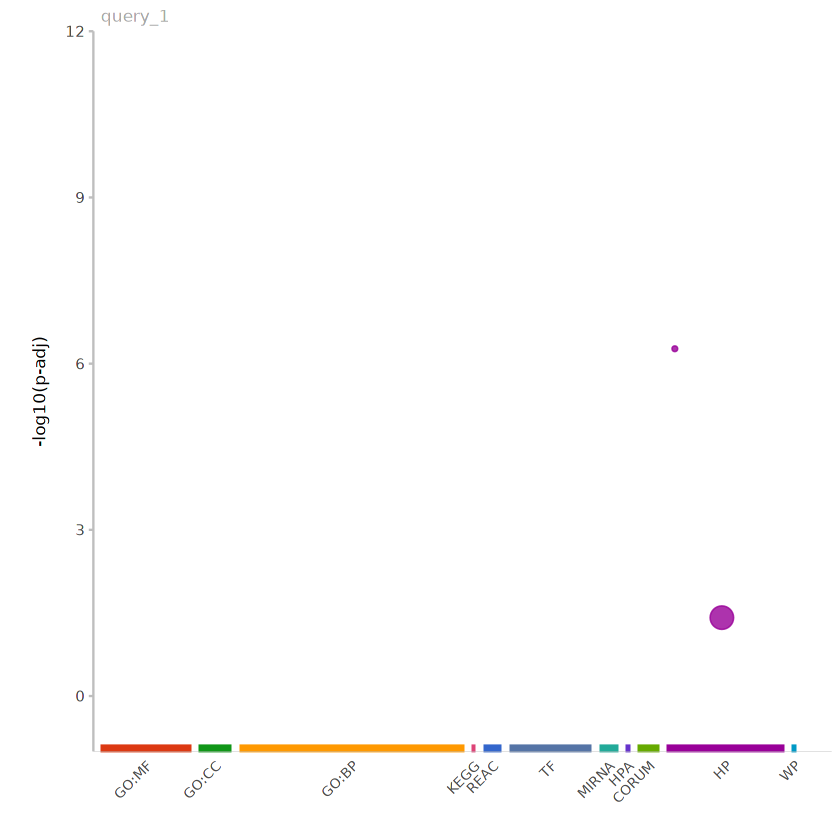

In [6]:
deg_male = deg %>% filter(logFC > 0)
gostres <- gost(query=deg_male$ensemblID, organism="hsapiens")
gostres$result %>% 
    data.table::fwrite(file = "male_bias_DEGs_functional_enrichment.txt", sep="\t")

p <- gostplot(gostres, capped = FALSE, interactive = FALSE)
print(p)
save_ggplots("male_bias_DEGs_manhattan", p, 9, 5)

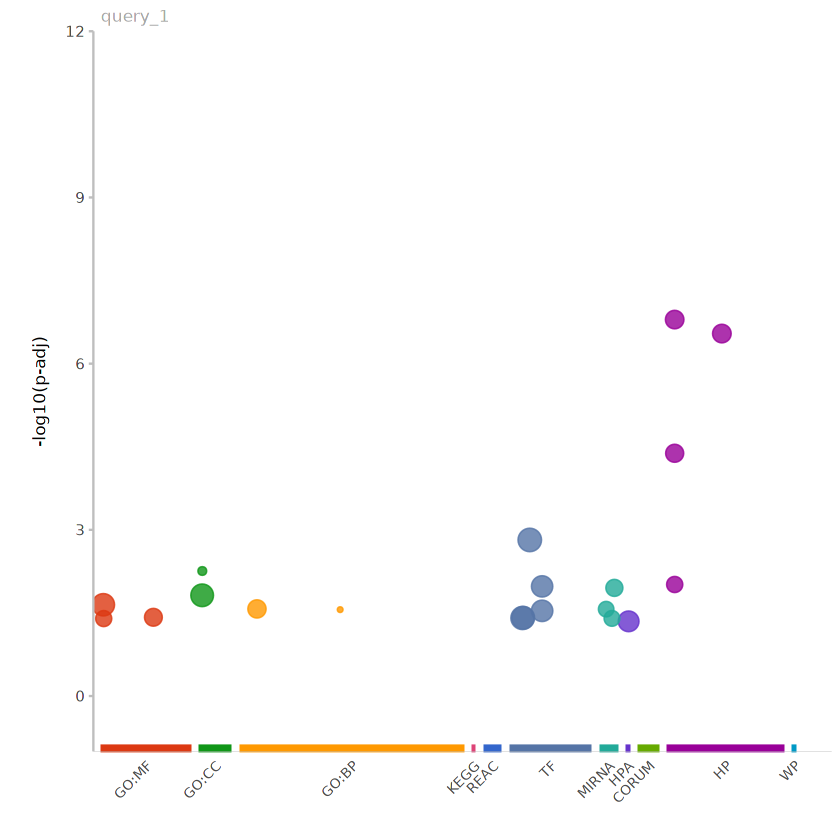

In [7]:
deg_female = deg %>% filter(logFC < 0)
gostres <- gost(query=deg_female$ensemblID, organism="hsapiens")
gostres$result %>% 
    data.table::fwrite(file = "female_bias_DEGs_functional_enrichment.txt", sep="\t")

p <- gostplot(gostres, capped = FALSE, interactive = FALSE)
print(p)
save_ggplots("female_bias_DEGs_manhattan", p, 9, 5)